In [17]:
import random
import numpy as np
import math
from matplotlib.patches import Rectangle, Circle
import matplotlib.pyplot as plt

In [18]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def set_closest_node(self, c):
        self.close_node = c 
        self.set_level(c.get_level()+1)
    def get_closest_node(self):
        return self.close_node 
    def set_level(self, l):
        self.level = l
    def get_level(self):
        return self.level
    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Node(x,y)
    def __pow__(self, power):
        x = self.x**power
        y = self.y**power
        return (x,y)
    def __mul__(self, b):
        x = self.x*b
        y = self.y*b
        return Node(x,y)
    def __truediv__(self, b):
        x = self.x/b
        y = self.y/b
        return Node(x,y)
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Node(x,y)
    def __eq__(self, other):
        if other.x == self.x and other.y == self.y:
            return True
        return False
    def print_path(self):
        length = 0
        node = self
        x_values = []
        y_values = []
        while(not node==start):
            print(node.x, node.y)
            x_values.append(node.x)
            y_values.append(node.y)
            node = node.close_node
            length +=1
        print(start.x, start.y)
        x_values.append(start.x)
        y_values.append(start.y)
        ax.plot(x_values, y_values, '.-', color="black")
        return length


In [19]:
sx, sy = input("Please enter Starting co-ordinates separated by a comma").split(',')
sx = int(sx)
sy = int(sy)

start = Node(sx,sy) #0 0

dx, dy = input("Please enter Destination co-ordinates").split(',')
dx = int(dx)
dy = int(dy)
dest = Node(dx,dy) #-5 10

#Distance between nodes
step = 5 
#Radius around the destination that will be considered as destination
radius = 2 
radius_sq = radius**2
#Radius around the new node where rerouting can take place
reroute_radius = 5
reroute_radius_sq = reroute_radius **2

#No of iterations to run
iterations = int(input("Enter number of iterations to run")) #100

no_obstacles = int(input("Enter number of obstacles"))
obstacles = []

for i in range(no_obstacles):
    sides = []
    px, py = input("Enter co-ordinates of the top left point for obstacle").split(',')
    px = float(px)
    py = float(py)
    length = float(input("Enter length of obstacle"))
    breadth = float(input("Enter breadth of obstacle"))
    sides.append(Node(px, py-breadth))
    sides.append(Node(px+length, py-breadth))
    sides.append(Node(px+length, py))
    sides.append(Node(px, py))
    obstacles.append(sides)
# Imagining box to be 100 * 100

In [20]:
def closest_node(new_point, nodes):
    node = (new_point.x, new_point.y)
    l = [(x.x, x.y) for x in nodes]
    l = np.asarray(l)

    dist_2 = np.sum((l - node)**2, axis=1)
    index = np.argmin(dist_2)
    
    return (index, dist_2[index]) 

In [21]:
def reach(node):
    dist = np.sum((dest-node)**2)
    if dist <= radius_sq:
        return True
    else:
        return False

In [32]:
def check(p1, q1):
    for ob in obstacles:
        for p in range(4):
            p2 = ob[p]
            q2 = ob[(p+1)%4]
            if doIntersect(p1, q1, p2, q2):
                return False
    return True

In [33]:
def onSegment(p, q, r):
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
        return True
    return False
  
def orientation(p, q, r):
    # to find the orientation of an ordered triplet (p,q,r)
    # function returns the following values:
    # 0 : Colinear points
    # 1 : Clockwise points
    # 2 : Counterclockwise
      
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
    if (val > 0):
          
        # Clockwise orientation
        return 1
    elif (val < 0):
          
        # Counterclockwise orientation
        return 2
    else:
          
        # Colinear orientation
        return 0
  
# The main function that returns true if 
# the line segment 'p1q1' and 'p2q2' intersect.
def doIntersect(p1,q1,p2,q2):
      
    # Find the 4 orientations required for the general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
  
    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True
  
    # Special Cases
  
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p1, p2, q1)):
        return True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(p1, q2, q1)):
        return True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p2, p1, q2)):
        return True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(p2, q1, q2)):
        return True
  
    # If none of the cases
    return False

In [38]:
def retry_close_node(new_node, index, nodes):
    node = (new_node.x, new_node.y)
    l = [(x.x, x.y) for x in nodes]
    l = np.asarray(l)

    #finding distance of node from all nodes
    dist_2 = np.sum((l - node)**2, axis=1)
    indices = []
    index2 = index
    least = 9999
    
    for i in range(len(dist_2)):
        if dist_2[i] <= reroute_radius_sq:
            
            if (check(new_node,nodes[i]) == False):
                continue;
            #appending all nodes within the routing radius of the new node
            indices.append(i)
            #if shorter path found
            if nodes[i].get_level() < least:
                index2 = i 
                least = nodes[i].get_level()

    close_node = nodes[index2]
    new_node.set_closest_node(close_node)
    nodes.append(new_node)

    plotting_values.append(list([close_node.x, new_node.x, close_node.y, new_node.y]))

    #Rewire nodes within the routing circle if smaller distance found
    for j in indices:
        if nodes[j].get_level() > least + 2:
            #print("Rerouted", nodes[j].x, nodes[j].y, new_node.x, new_node.y )
            nodes[j].set_closest_node(new_node)
            plotting_values[j] = [nodes[j].x, new_node.x, nodes[j].y, new_node.y]
        
    return index2

Reached Destination
Length of path 27
-1.3182840479005402 0.930680944258689
3.6748178784225707 1.1932321837309825
6.136160872495308 5.5454489367809785
9.125545847582595 9.553388241551247
11.635540659604612 13.877729352474685
8.39489068241292 17.685377934648134
6.3740888382641065 22.258818642330343
1.5138977443415005 21.084705133952482
-3.1323788140026343 19.23751425497387
-7.986114511079381 20.438034884918604
-12.4722943278011 22.645791812670996
-17.284561019795852 24.00302771151758
-22.259995458722802 24.498055128879162
-27.247436147019855 24.852223705575383
-32.00026281154858 23.299600539142283
-35.94274955475161 20.224409767878107
-33.37144427382054 15.9362412599652
-31.821837285863502 11.182430348404381
-31.74646541344012 6.182998472596152
-35.90822891529494 3.4117668773249985
-36.43406028075122 -1.560506382975805
-31.726534694992 -3.2454998130586423
-30.546934494968113 -8.104362166336784
-34.80790707627214 -10.720487671998798
-39.65733107893807 -9.502667142377325
-43.9654680252536

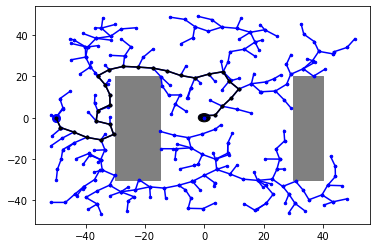

Reached Destination
Length of path 24
-1.8870979128188639 0.5486318378931871
-6.1019837835766095 3.0964728536211834
-9.734295516443343 6.532504209019249
-8.175016665958026 11.010711424808893
-12.016338453511574 10.981355749965182
-14.20658051223134 15.476112664884496
-14.585383254103432 19.794175208852312
-17.284561019795852 24.00302771151758
-22.259995458722802 24.498055128879162
-27.247436147019855 24.852223705575383
-32.00026281154858 23.299600539142283
-35.94274955475161 20.224409767878107
-40.23870097152141 19.991504390685822
-41.650718086985925 16.35002886394663
-45.18247358807125 12.810720586817673
-48.65269962325976 9.211063483050726
-47.519305308215834 4.341215710622296
-50 0


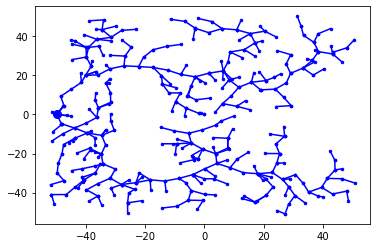

Destination not reached


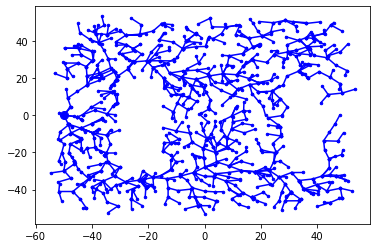

In [48]:
start.set_level(0)
nodes = [start]
fig, ax = plt.subplots()
plt.ion()
plotting_values = [[0,0,0,0]]

for i in range(iterations):
    #Randomly generate a point on the screen
    new_point = Node(random.randint(-50, 50), random.randint(-50, 50))
    
    #find the closest node in the tree
    index, dist_sq = closest_node(new_point, nodes)
    
    close_node = nodes[index]
    dist = (math.sqrt(dist_sq))
    
    #If randomly generated node already exists in the tree
    if dist == 0:
        print("dist is 0")
        i-=1
        continue

    new_node = ((new_point - close_node) * step/dist)
    new_node = ((new_node + close_node))
    #new_node = tuple(round(x) for x in new_node)
    
    #Check if this new node lands on an obstacle
    if(check(close_node, new_node) == False):
        i-=1
        continue
    
    
    #Main addition to the RRT*, to rewire nodes
    retry_close_node(new_node, index, nodes)
    
    if reach(new_node):
        print("Reached Destination")
        print("Length of path", new_node.get_level())
        
        #plotting the data
        for j in range(len(plotting_values)):
            x_values = [plotting_values[j][0], plotting_values[j][1]]
            y_values = [plotting_values[j][2], plotting_values[j][3]]
            plt.plot(x_values, y_values, '.-', markersize = 5,  color="blue" )

        for ob in obstacles:
            bottom_left = (ob[0].x, ob[0].y)
            length = ob[1].x - ob[0].x
            breadth = ob[2].y - ob[1].y
            plt.gca().add_patch(Rectangle(bottom_left, length, breadth, color ='grey', linestyle="solid") )

        plt.gca().add_patch( Circle((dest.x, dest.y), radius, color="black"))
        plt.plot(start.x, start.y, 'o', markersize=8, color = "blue")
        new_node.print_path()
        
        plt.show()
    
        cont = input("Do you want to continue to find a shorter path?\n1 for yes, 0 for no")
        if cont:
           continue
        break 
    
    
else:
    print("Destination not reached")
    for j in range(len(plotting_values)):
        x_values = [plotting_values[j][0], plotting_values[j][1]]
        y_values = [plotting_values[j][2], plotting_values[j][3]]
        plt.plot(x_values, y_values, '.-', markersize = 5,  color="blue" )
    
    #Drawing the obstacles
    for ob in obstacles:
        bottom_left = (ob[0].x, ob[0].y)
        length = ob[1].x - ob[0].x
        breadth = ob[2].y - ob[1].y
        plt.gca().add_patch(Rectangle(bottom_left, length, breadth, color ='grey', linestyle="solid") )

    plt.gca().add_patch( Circle((dest.x, dest.y), radius, color="black"))
    plt.plot(start.x, start.y, 'o', markersize=8, color = "blue")
    plt.show()
